# Data Processing

In [67]:
from statistics import median
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib as mpl
import seaborn as sb

feature_list_xlsx = ["CZA","CZB","CZD","CZH","CZM","CZV","PMC","TRF"]
feature_list_csv = ["EDU","MHI","new_housing","Public_Assistance_Rate","median_gross_rent","median_monthly_housing_costs",
"perc_below_poverty", "perc_college_grad","perc_hs_grad","perc_insured","perc_rental_housing","unemployment","vacancies","work_travel_time"]
path = os.path.join(os.getcwd(),'data_clean')
feature_values = pd.read_excel(os.path.join(path,'TRF_2016.xlsx'))
geoid = feature_values['GEOID']
dataframes = {}

# Read in feature values
year = 2016
df_dict = {}
df_dict['GEOID'] = geoid
for feature in feature_list_xlsx:
    file_name = feature + "_" + str(year) + '.xlsx'
    feature_values = pd.read_excel(os.path.join(path,file_name))
    df_dict[feature] = feature_values[file_name[:-5]]
for feature in feature_list_csv:
    file_name = feature + "_" + str(year) + '.csv'
    feature_values = pd.read_csv(os.path.join(path,file_name))
    df_dict[feature] = feature_values[file_name[:-4]]
dataframes[year] = pd.DataFrame(df_dict)

feature_values = pd.concat(dataframes.values(), ignore_index=True)
feature_values = feature_values.apply(pd.to_numeric, errors='coerce')

# Read in house values
house_values = pd.read_csv(os.path.join(path,'home_value.csv'))
renamed_geoid = []
for row in house_values['GEOID']:
    tract_num = (row.split(',')[0]).replace("Census Tract ",'')
    if ('.' in tract_num):
        if len(tract_num) == 6:
            tract_num = '0' + tract_num
        tract_num = '17031' + tract_num.replace('.','')
    else:
        if len(tract_num) == 3:
            tract_num = '0' + tract_num
        tract_num = '17031' + tract_num + '00'
    renamed_geoid.append(int(tract_num))

house_values['GEOID'] = renamed_geoid
house_values_2016 = house_values[house_values['YEAR'] == 2016]
house_values_2016 = house_values_2016.rename(columns = {"house_value": "house_value_2016"})
house_values_2018 = house_values[house_values['YEAR'] == 2018]
house_values_2018 = house_values_2018.rename(columns = {"house_value": "house_value_2018"})

y_labels = pd.merge(house_values_2016, house_values_2018, on = ['GEOID'])
y_labels['house_val_change'] = y_labels["house_value_2018"] / y_labels["house_value_2016"]
y_labels = y_labels[['GEOID','house_val_change']]

# Create dataframe of feature and outcome values
df = pd.merge(y_labels, feature_values, on=['GEOID'])
col_dict = {'CZA': 'violent_crime',"CZB":"burglary","CZD":"drug_abuse",'CZH': 'aggravated_assault', "CZM": "major_crime", 
'CZV': 'homicide',"PMC":"pollution", 'TRF': 'traffic_intensity', 'EDU': 'college_enrolled','MHI': 'household_income', 
"Public_Assistance_Rate":"public_assistance","vacancies":"housing_vacancies"}

feature_list = col_dict.values()
# feature_list = feature_list_xlsx + feature_list_csv

df = df.rename(columns = col_dict)
print(df)

           GEOID  house_val_change  violent_crime  burglary  drug_abuse  \
0    17031010100          1.115735           21.0      20.0        13.0   
1    17031010201          1.035738           23.0      26.0         9.0   
2    17031010202          1.198800           13.0      10.0        14.0   
3    17031010300          0.919090            9.0      15.0         4.0   
4    17031010400          1.015335           15.0      20.0         5.0   
..           ...               ...            ...       ...         ...   
776  17031843500          1.145136           10.0      17.0        12.0   
777  17031843600          0.998868            5.0      28.0        15.0   
778  17031843700          1.100542           19.0       0.0       169.0   
779  17031843800          0.993623           37.0       2.0        17.0   
780  17031843900          0.796806            9.0       0.0         0.0   

     aggravated_assault  major_crime  homicide  pollution  traffic_intensity  \
0                  

# Summary Statistics

In [68]:
df = df.drop('GEOID',1)
print(df.head())
print(df.describe())
print(df.dtypes)

   house_val_change  violent_crime  burglary  drug_abuse  aggravated_assault  \
0          1.115735           21.0      20.0        13.0                 1.0   
1          1.035738           23.0      26.0         9.0                 2.0   
2          1.198800           13.0      10.0        14.0                 0.0   
3          0.919090            9.0      15.0         4.0                 1.0   
4          1.015335           15.0      20.0         5.0                 1.0   

   major_crime  homicide  pollution  traffic_intensity  college_enrolled  ...  \
0        153.0      34.0  11.449365           0.795343              24.0  ...   
1        157.0      49.0  11.507208          12.009642              24.6  ...   
2        296.0      47.0  11.494258          10.433684              36.0  ...   
3        139.0      29.0  11.482891           8.353382              38.2  ...   
4        140.0      28.0  11.521601          17.952882              77.7  ...   

   median_gross_rent  median_mon

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [69]:
print(df.dtypes)

house_val_change                float64
violent_crime                   float64
burglary                        float64
drug_abuse                      float64
aggravated_assault              float64
major_crime                     float64
homicide                        float64
pollution                       float64
traffic_intensity               float64
college_enrolled                float64
household_income                float64
new_housing                     float64
public_assistance               float64
median_gross_rent               float64
median_monthly_housing_costs    float64
perc_below_poverty              float64
perc_college_grad               float64
perc_hs_grad                    float64
perc_insured                    float64
perc_rental_housing             float64
unemployment                    float64
housing_vacancies               float64
work_travel_time                float64
dtype: object


The dataframe comprises 2557 observations, where each observation contains the median house value (outcome variable) and 9 feature variables for a given census tract and year. The variables will be split 80:20, so that 80% of the data is in the training dataset and 20% is in the testing dataset.

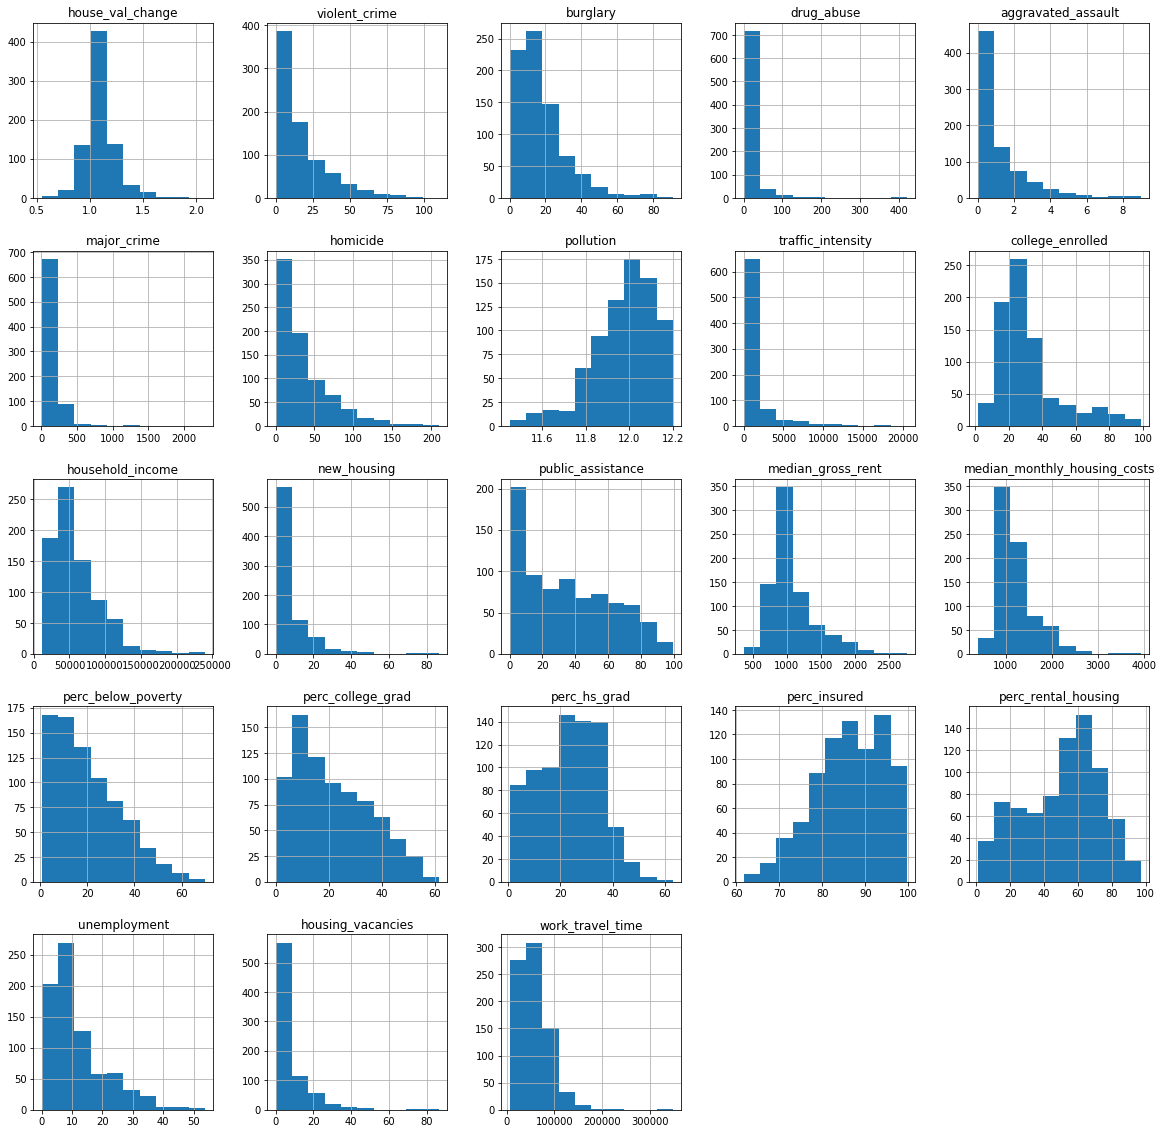

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(figsize=(20,20))
plt.show()

From plotting the distribution of the feature values, we observe that features vary significantly in scale, so we will be normalizing the feature parameters. We can also observe that features such as assault and traffic instensity are significantly skewed with most values being in the lowest value bucket, as such, we have concerns that there may no be enough variation in those features to be valuable for the model. We fortunately do not observe any outliers that would need to be excluded.

house_val_change                1.000000
perc_college_grad               0.082423
median_gross_rent               0.060254
household_income                0.046872
perc_rental_housing             0.045520
median_monthly_housing_costs    0.044553
work_travel_time                0.041318
housing_vacancies               0.034348
new_housing                     0.034348
college_enrolled                0.032309
major_crime                    -0.017415
perc_insured                   -0.020061
burglary                       -0.024210
aggravated_assault             -0.026453
traffic_intensity              -0.037251
pollution                      -0.042002
homicide                       -0.050447
perc_below_poverty             -0.052258
violent_crime                  -0.065140
drug_abuse                     -0.067353
public_assistance              -0.071689
perc_hs_grad                   -0.077196
unemployment                   -0.091930
Name: house_val_change, dtype: float64


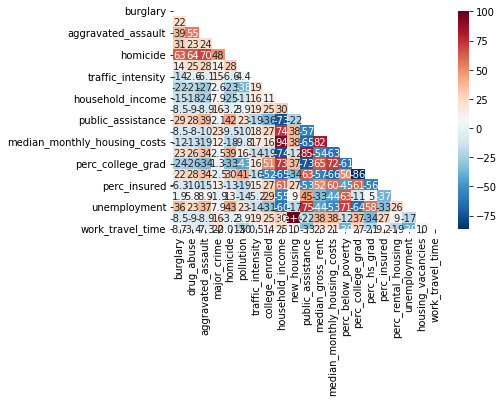

In [71]:
corr_matrix = df.corr()
print(corr_matrix["house_val_change"].sort_values(ascending=False))
mask = np.zeros_like(df.iloc[:,2:].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(df.iloc[:,2:].corr()*100, cmap='RdBu_r', annot = True, mask=mask)

Based on the heat map of the correlations of features, we can see that there is a positive correlation between housing price and median household income for an area, as well as the percent of the population enrolled in college. We can also observe a strong negative correlation between household price and unemployment levels and crime levels in the area. There is strong correlation between the crime features, which my make it worth combining them into a single feature.

# Feature Engineering

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop('house_val_change', 1)
y = df['house_val_change']

imputer = SimpleImputer(strategy="median")

# Replace NA feature values with feature median
for feature in feature_list:
    col_ave = X[feature].median()
    X[feature].fillna(value = col_ave, inplace = True)

# Attempted combining variables, but models did not change from collapsing crime measures, and deterioriated from collapsing crime and poverty measures
# Collapse crime and poverty measures into one variable each
# X['crime_rate'] = X['violent_crime'] + X['aggravated_assault'] + X['homicide']
# X = X.drop(['violent_crime','aggravated_assault','homicide'],1)

# X['poverty_index'] = X['poverty_rate'] + X['rental_rate'] + X['unemploy_rate']
# X = X.drop(['poverty_rate','rental_rate','unemploy_rate'],1)

#feature_list = ['traffic_intensity', 'college_rate','household_income','poverty_rate','rental_rate','unemploy_rate','crime_rate']

# Scale all features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
X_trans = (num_pipeline.fit_transform(X))

train_x, test_x, train_y, test_y = train_test_split(X_trans, y.to_numpy(), test_size=0.2, random_state=123)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Model Training

### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)
lin_predictions = lin_reg.predict(train_x) 
lin_mse = mean_squared_error(train_y, lin_predictions)  
lin_rmse = np.sqrt(lin_mse) 
print(lin_rmse)
#print(mean_absolute_error(train_y, lin_predictions))

# Cross validation
lin_scores = cross_val_score(lin_reg, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

0.14103091357791023
Scores: [0.16350882 0.11230136 0.14860447 0.13199212 0.14053913 0.1480205
 0.14465735 0.14432115 0.15975829 0.16580337]
Mean: 0.1459506556300383
Standard deviation: 0.015050335030435869


### Decision Trees

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(train_x, train_y)
dt_predictions = tree_reg.predict(train_x)
scores = cross_val_score(tree_reg, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.24722065 0.14585643 0.23061283 0.21582473 0.19681443 0.16176218
 0.17328003 0.26627146 0.2356018  0.23536822]
Mean: 0.21086127621654077
Standard deviation: 0.03777002979001269


### Support Vector Machine

In [75]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_x, train_y)
svm_predictions = svm_reg.predict(train_x)
svm_mse = mean_squared_error(train_y, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.141679326077617

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=123)
forest_reg.fit(train_x, train_y)
rf_predictions = forest_reg.predict(train_x) 
forest_mse = mean_squared_error(train_y, rf_predictions) 
forest_rmse = np.sqrt(forest_mse) 
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, train_x, train_y,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

0.055334804626838874
Scores: [0.17544028 0.10746557 0.1550714  0.13559244 0.15394621 0.16011837
 0.14691263 0.147726   0.16683755 0.16456071]
Mean: 0.15136711424047647
Standard deviation: 0.018163609023299946


### Gradient Boosted Trees

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

boosted_reg = GradientBoostingRegressor(n_estimators=100, random_state=123)
boosted_reg.fit(train_x, train_y)
boosted_predictions = boosted_reg.predict(train_x) 
boosted_mse = mean_squared_error(train_y, boosted_predictions) 
boosted_rmse = np.sqrt(boosted_mse) 
print(boosted_rmse)

boosted_scores = cross_val_score(boosted_reg, train_x, train_y,scoring="neg_mean_squared_error", cv=10)
boosted_rmse_scores = np.sqrt(-boosted_scores)
display_scores(boosted_rmse_scores)

0.08634375290830687
Scores: [0.19073369 0.106547   0.15992099 0.13857751 0.15104417 0.14903302
 0.13799143 0.16493109 0.16466109 0.15872841]
Mean: 0.1522168401709958
Standard deviation: 0.020946247724464143


# Fine Tuning Model Using Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [5, 10, 50, 100], 'max_features': [2, 8, 10]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_x, train_y)
print(grid_search.best_params_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

feature_importances = grid_search.best_estimator_.feature_importances_
#print(sorted(zip(feature_importances, ['YEAR'] + feature_list_xlsx + feature_list_csv), reverse=True))


{'max_features': 2, 'n_estimators': 100}
0.16656280512823857 {'max_features': 2, 'n_estimators': 5}
0.16250738053879918 {'max_features': 2, 'n_estimators': 10}
0.14916096267439746 {'max_features': 2, 'n_estimators': 50}
0.1479291355907942 {'max_features': 2, 'n_estimators': 100}
0.16763224068428825 {'max_features': 8, 'n_estimators': 5}
0.1619294082318101 {'max_features': 8, 'n_estimators': 10}
0.15201652833067644 {'max_features': 8, 'n_estimators': 50}
0.15057816592404127 {'max_features': 8, 'n_estimators': 100}
0.16294644826869087 {'max_features': 10, 'n_estimators': 5}
0.16074929468717744 {'max_features': 10, 'n_estimators': 10}
0.15150341421383673 {'max_features': 10, 'n_estimators': 50}
0.1516775832992254 {'max_features': 10, 'n_estimators': 100}
0.16687495216290194 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
0.16003606571589205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.15236576822739137 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}

# Model Evaluation

In [79]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_x)

final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print("rmse:", final_rmse)
print("R^2:", r2_score(test_y, final_predictions))
print("MAE:", mean_absolute_error(test_y, final_predictions))

# # Computing 95% confidence interval
# from scipy import stats
# confidence = 0.95
# squared_errors = (final_predictions - test_y) ** 2
# np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
#                          loc=squared_errors.mean(),
#                          scale=stats.sem(squared_errors)))

# forest_reg = RandomForestRegressor(n_estimators=50, random_state=123)
# forest_reg.fit(train_x, train_y)
# final_predictions = forest_reg.predict(test_x) 
# final_mse = mean_squared_error(test_y, final_predictions)
# final_rmse = np.sqrt(final_mse)
# print("rmse:", final_rmse)
# print("R^2:", r2_score(test_y, final_predictions))
# print("MAE:", mean_absolute_error(test_y, final_predictions))

rmse: 0.1627800860852251
R^2: -0.034537800216329906
MAE: 0.10656602201422843
